### Import modules

In [1]:
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load dataset and reshape it to one dimension

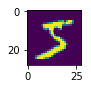

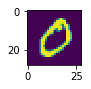

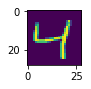

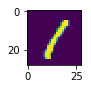

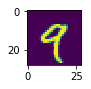

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# display some images from the dataset
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(x_train[i])
    plt.show()
    
#reshape
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### Build a simple Autoencoder model, using the Keras Functional API

In [3]:
input_layer = Input(shape=(784,))

encoding_layer = Dense(32, activation='relu')(input_layer)
decoding_layer = Dense(784, activation='sigmoid')(encoding_layer)

autoencoder = Model(input_layer, decoding_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Build an improved Autoencoder model, using the Keras Functional API

In [4]:
input_layer = Input(shape=(784,))

encoding_layer1 = Dense(128, activation='relu')(input_layer)
encoding_layer2 = Dense(64, activation='relu')(encoding_layer1)

encoding_layer3 = Dense(32, activation='relu')(encoding_layer2)

decoding_layer1 = Dense(64, activation='relu')(encoding_layer2)
decoding_layer2 = Dense(128, activation='relu')(decoding_layer1)

output_decoding_layer = Dense(784, activation='sigmoid')(decoding_layer2)

autoencoder = Model(input_layer, output_decoding_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Build a deep convolutional Autoencoder model, using the Keras Functional API

In [3]:
input_layer = Input(shape=(28, 28, 1))

#encoder
encoding_layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
max_pool_1 = MaxPooling2D((2, 2), padding='same')(encoding_layer1)
encoding_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(max_pool_1)
max_pool_2 = MaxPooling2D((2, 2), padding='same')(encoding_layer2)

#decoder
decoding_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(max_pool_2)
upsampling_layer1 = UpSampling2D((2, 2))(decoding_layer1)
decoding_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(upsampling_layer1)
upsampling_layer2 = UpSampling2D((2, 2))(decoding_layer2)

output_decoding_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsampling_layer2)

autoencoder = Model(input_layer, output_decoding_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Load data, reshape and rescale it

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.     
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Add noise to images

In [33]:
noise_factor = 0.4
x_train_noise  = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

### Display images with noise

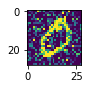

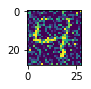

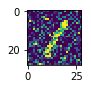

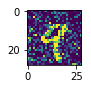

In [34]:
for i in range(1,5):
    plt.figure(figsize=(1,1))
    plt.imshow(x_train_noise[i].reshape(28,28))
    plt.show()

### Train the model

In [39]:
autoencoder.fit(x_train_noise, x_train, epochs=10, batch_size=128, shuffle=True, validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 4s - loss: 0.0879 - val_loss: 0.0882
Epoch 2/10
51000/51000 [==============================] - 4s - loss: 0.0875 - val_loss: 0.0884
Epoch 3/10
51000/51000 [==============================] - 4s - loss: 0.0872 - val_loss: 0.0875
Epoch 4/10
51000/51000 [==============================] - 4s - loss: 0.0869 - val_loss: 0.0873
Epoch 5/10
51000/51000 [==============================] - 4s - loss: 0.0866 - val_loss: 0.0870
Epoch 6/10
51000/51000 [==============================] - 4s - loss: 0.0863 - val_loss: 0.0868
Epoch 7/10
51000/51000 [==============================] - 4s - loss: 0.0861 - val_loss: 0.0866
Epoch 8/10
51000/51000 [==============================] - 4s - loss: 0.0858 - val_loss: 0.0864
Epoch 9/10
51000/51000 [==============================] - 4s - loss: 0.0856 - val_loss: 0.0862
Epoch 10/10
51000/51000 [==============================] - 4s - loss: 0.0854 - val_loss: 0.0860


### Test the convolutional Autoencoder on the test images with noise

In [40]:
output_images = autoencoder.predict(x_test_noise)

### Display noisy images before passing them through the Autoencoder and output images 

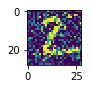

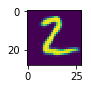

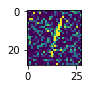

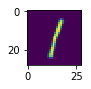

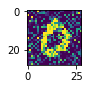

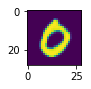

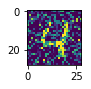

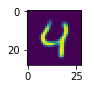

In [45]:
for i in range(1,5):
    plt.figure(figsize=(1,1))
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.show()
    plt.figure(figsize=(1,1))
    plt.imshow(output_images[i].reshape(28,28))
    plt.show()